In [1]:
# Импорт основных библиотек
import numpy as np
import pandas as pd
from scipy import stats

# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Импорт библиотек добавления синтетических данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from scipy.io.arff import loadarff 

## Загрузка исходных данных

In [2]:
raw_data1 = loadarff('/home/timur/Classification-Traffic/data/raw/TimeBasedFeatures-Dataset-15s-VPN.arff')
df1 = pd.DataFrame(raw_data1[0])

raw_data2 = loadarff('/home/timur/Classification-Traffic/data/raw/TimeBasedFeatures-Dataset-30s-VPN.arff')
df2 = pd.DataFrame(raw_data2[0])

raw_data3 = loadarff('/home/timur/Classification-Traffic/data/raw/TimeBasedFeatures-Dataset-60s-VPN.arff')
df3 = pd.DataFrame(raw_data3[0])

raw_data4 = loadarff('/home/timur/Classification-Traffic/data/raw/TimeBasedFeatures-Dataset-120s-VPN.arff')
df4 = pd.DataFrame(raw_data4[0])

In [3]:
df1

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,1815.741336,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-BROWSING'
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,998.912938,1648.183118,...,8971.721519,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-BROWSING'
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5204.310999,283.541956,...,65256.442153,5816127.0,5816127.0,5816127.0,0.000000,3777807.0,3777807.0,3777807.0,0.000000,b'VPN-BROWSING'
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6497.646744,215.416324,...,51735.382672,5068736.0,5435233.5,5801731.0,518305.735075,1141447.0,1708300.0,2275153.0,801651.200471,b'VPN-BROWSING'
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2648.293598,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-BROWSING'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-VOIP'
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-VOIP'
9790,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-VOIP'
9791,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,b'VPN-VOIP'


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9793 entries, 0 to 9792
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            9793 non-null   float64
 1   total_fiat          9793 non-null   float64
 2   total_biat          9793 non-null   float64
 3   min_fiat            9793 non-null   float64
 4   min_biat            9793 non-null   float64
 5   max_fiat            9793 non-null   float64
 6   max_biat            9793 non-null   float64
 7   mean_fiat           9793 non-null   float64
 8   mean_biat           9793 non-null   float64
 9   flowPktsPerSecond   9793 non-null   float64
 10  flowBytesPerSecond  9793 non-null   float64
 11  min_flowiat         9793 non-null   float64
 12  max_flowiat         9793 non-null   float64
 13  mean_flowiat        9793 non-null   float64
 14  std_flowiat         9793 non-null   float64
 15  min_active          9793 non-null   float64
 16  mean_a

In [5]:
df1['class1'] = df1.class1.astype(str)
df2['class1'] = df2.class1.astype(str)
df3['class1'] = df3.class1.astype(str)
df4['class1'] = df4.class1.astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9793 entries, 0 to 9792
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            9793 non-null   float64
 1   total_fiat          9793 non-null   float64
 2   total_biat          9793 non-null   float64
 3   min_fiat            9793 non-null   float64
 4   min_biat            9793 non-null   float64
 5   max_fiat            9793 non-null   float64
 6   max_biat            9793 non-null   float64
 7   mean_fiat           9793 non-null   float64
 8   mean_biat           9793 non-null   float64
 9   flowPktsPerSecond   9793 non-null   float64
 10  flowBytesPerSecond  9793 non-null   float64
 11  min_flowiat         9793 non-null   float64
 12  max_flowiat         9793 non-null   float64
 13  mean_flowiat        9793 non-null   float64
 14  std_flowiat         9793 non-null   float64
 15  min_active          9793 non-null   float64
 16  mean_a

## Разведочный анализ

In [6]:
df1.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9793.000000,...,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03,9.793000e+03
mean,8.758938e+06,8.025248e+06,8.249810e+06,9.242843e+05,9.409360e+05,3.091292e+06,3.311594e+06,1.237865e+06,1.239086e+06,2458.106292,...,5.456354e+05,1.048985e+06,3.123440e+06,3.492648e+06,3.944713e+06,4.883331e+05,2.764782e+06,3.088653e+06,3.486364e+06,4.316987e+05
std,1.302791e+07,7.262116e+06,1.257391e+07,2.771688e+06,2.838633e+06,5.420558e+06,1.168177e+07,2.828995e+06,2.954273e+06,19214.064227,...,1.196621e+06,2.608027e+06,1.183768e+07,1.197194e+07,1.244067e+07,2.707813e+06,1.173072e+07,1.186184e+07,1.231706e+07,2.674770e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,4.134140e+05,2.757320e+05,1.698520e+05,1.000000e+01,6.000000e+00,3.027900e+04,2.496300e+04,1.579634e+04,6.471773e+03,2.215682,...,9.959598e+03,7.272391e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,1.007813e+07,1.003888e+07,1.003888e+07,4.900000e+01,2.700000e+01,8.698840e+05,7.467910e+05,1.811580e+05,1.340235e+05,8.541311,...,1.322832e+05,1.832485e+05,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,1.449381e+07,1.440413e+07,1.440391e+07,7.309000e+03,4.114000e+03,5.045630e+06,5.010343e+06,7.873407e+05,7.100662e+05,79.218379,...,4.367352e+05,9.182308e+05,3.437590e+06,4.880682e+06,6.793502e+06,0.000000e+00,2.390594e+06,3.760672e+06,5.236813e+06,0.000000e+00
max,6.014050e+08,1.919551e+08,6.011851e+08,2.084092e+07,1.612268e+07,1.913169e+08,6.001097e+08,2.740000e+07,4.000000e+07,666666.666667,...,2.000000e+07,6.930000e+07,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08


In [76]:
combined_df1.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,17500.000000,...,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04,1.750000e+04
mean,7.996110e+06,7.333311e+06,7.488714e+06,6.110086e+05,5.923292e+05,2.598312e+06,2.770763e+06,8.884161e+05,8.339713e+05,3682.622516,...,4.158251e+05,7.709426e+05,2.740703e+06,3.048230e+06,3.413527e+06,3.956655e+05,2.374564e+06,2.636013e+06,2.947728e+06,3.379054e+05
std,1.085704e+07,6.975400e+06,1.053296e+07,2.253223e+06,2.281327e+06,4.648531e+06,9.228059e+06,2.328822e+06,2.390283e+06,20140.399689,...,1.020657e+06,2.092776e+06,9.454759e+06,9.570093e+06,9.947785e+06,2.121166e+06,9.302052e+06,9.409257e+06,9.767503e+06,2.075204e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,2.793464e+05,1.773105e+05,0.000000e+00,1.100000e+01,-1.000000e+00,2.753825e+04,-1.000000e+00,4.936599e+03,0.000000e+00,2.748191,...,6.058905e+03,5.675846e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,9.341130e+06,7.561068e+06,7.482190e+06,4.700000e+01,1.900000e+01,4.196401e+05,4.323226e+05,1.050332e+05,2.417192e+04,11.214661,...,8.720873e+04,8.767774e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,1.444647e+07,1.440162e+07,1.440037e+07,8.127151e+02,4.582500e+02,3.751386e+06,3.638564e+06,4.811527e+05,3.962343e+05,112.201998,...,2.767570e+05,6.452640e+05,2.998679e+06,4.252449e+06,5.609946e+06,0.000000e+00,2.012371e+06,3.092286e+06,4.118194e+06,0.000000e+00
max,6.014050e+08,1.919551e+08,6.011851e+08,2.084092e+07,1.612268e+07,1.913169e+08,6.001097e+08,2.740000e+07,4.000000e+07,666666.666667,...,2.000000e+07,6.930000e+07,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08


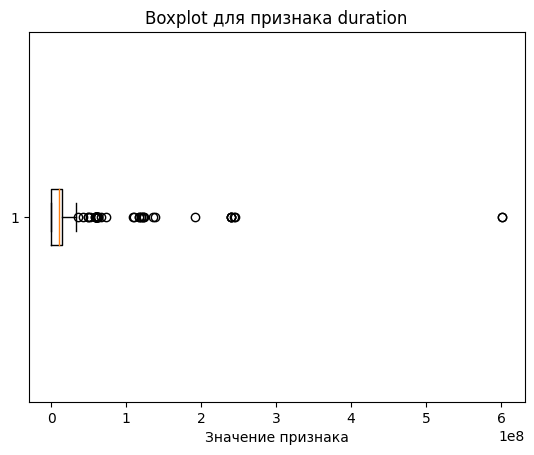

In [7]:
feature = df1['duration']

# Создание горизонтального boxplot'а
plt.boxplot(feature, vert=False)

# Настройка осей и заголовка
plt.xlabel('Значение признака')
plt.title('Boxplot для признака duration')

# Отображение графика
plt.show()


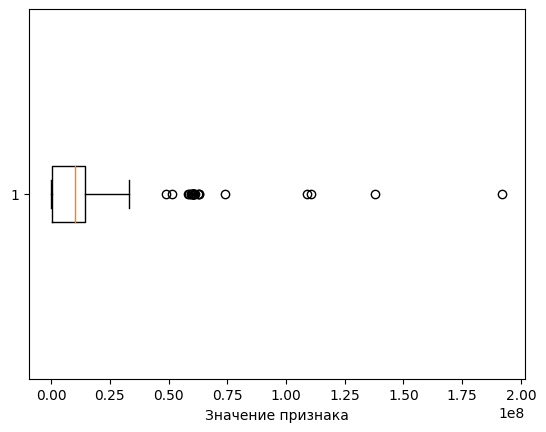

In [8]:
feature = df1['total_fiat']

# Создание горизонтального boxplot'а
plt.boxplot(feature, vert=False)

# Настройка осей и заголовка
plt.xlabel('Значение признака')
#plt.title('Boxplot для признака total_fiat ')

# Отображение графика
plt.show()


In [9]:
df1[df1.total_biat>1.e8]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
21,601185075.0,1114228.0,600965621.0,20.0,22.0,224169.0,600070854.0,11728.715789,5.834618e+06,0.332676,...,42500000.0,601185075.0,601000000.0,601185075.0,0.0,600070847.0,600000000.0,600070847.0,0.0,VPN-BROWSING
22,601404954.0,1295300.0,601185122.0,12.0,14.0,406429.0,600109667.0,15796.341463,5.836749e+06,0.310939,...,44000000.0,601404954.0,601000000.0,601404954.0,0.0,600109654.0,600000000.0,600109654.0,0.0,VPN-BROWSING
27,243280799.0,3287480.0,243252392.0,30.0,10.0,2426318.0,239993334.0,80182.439024,3.378505e+06,0.472705,...,22500000.0,2628586.0,122000000.0,240652213.0,168000000.0,2426318.0,121000000.0,239993319.0,168000000.0,VPN-BROWSING
54,240149773.0,200344.0,240124018.0,31.0,9.0,65221.0,239949444.0,9540.190476,6.157026e+06,0.258172,...,30700000.0,240149773.0,240000000.0,240149773.0,0.0,239949429.0,240000000.0,239949429.0,0.0,VPN-BROWSING
197,240421673.0,473790.0,240396338.0,270.0,20.0,211001.0,240000106.0,52643.333333,2.000000e+07,0.095665,...,51200000.0,240421673.0,240000000.0,240421673.0,0.0,239947883.0,240000000.0,239947883.0,0.0,VPN-BROWSING
550,119721959.0,567509.0,119634813.0,19967.0,87.0,94725.0,119154489.0,70938.625000,1.500000e+07,0.150348,...,28900000.0,119721959.0,120000000.0,119721959.0,0.0,119154450.0,119000000.0,119154450.0,0.0,VPN-BROWSING
553,122830402.0,530882.0,122745330.0,13349.0,89.0,91665.0,122299548.0,66360.250000,1.530000e+07,0.146544,...,29700000.0,122830402.0,123000000.0,122830402.0,0.0,122299520.0,122000000.0,122299520.0,0.0,VPN-BROWSING
707,124505320.0,233278.0,124472929.0,7.0,1.0,76076.0,124315346.0,33325.428571,1.560000e+07,0.136540,...,31100000.0,124505320.0,125000000.0,124505320.0,0.0,124272042.0,124000000.0,124272042.0,0.0,VPN-BROWSING
720,117539962.0,242921.0,117507703.0,52.0,14.0,89789.0,117354079.0,34703.000000,1.680000e+07,0.136124,...,30300000.0,117539962.0,118000000.0,117539962.0,0.0,117297041.0,117000000.0,117297041.0,0.0,VPN-BROWSING
851,117148717.0,389470.0,117063275.0,1813.0,39.0,90834.0,116759276.0,64911.666667,1.950000e+07,0.119506,...,32400000.0,117148717.0,117000000.0,117148717.0,0.0,116759247.0,117000000.0,116759247.0,0.0,VPN-BROWSING


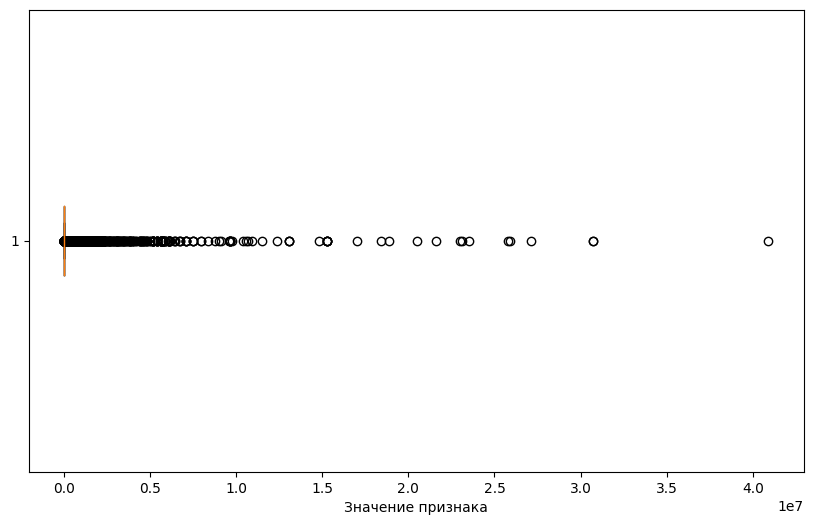

In [10]:
feature = df1['flowBytesPerSecond']

# Установка размеров изображения
plt.figure(figsize=(10, 6))  # Пример: ширина 10 дюймов, высота 6 дюймов

# Создание горизонтального boxplot'а
plt.boxplot(feature, vert=False)

# Настройка осей и заголовка
plt.xlabel('Значение признака')
#plt.title('Boxplot для признака total_fiat')

# Отображение графика
plt.show()

/tmp/ipykernel_4581/734681661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['flowBytesPerSecond'].dropna())


<Axes: xlabel='flowBytesPerSecond', ylabel='Density'>

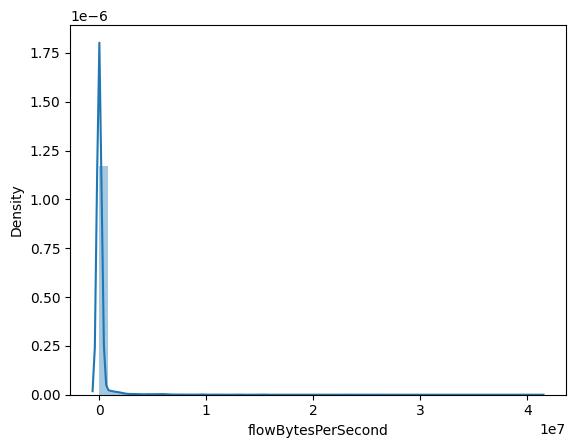

In [11]:
sns.distplot(df1['flowBytesPerSecond'].dropna())

/tmp/ipykernel_4581/326420999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['total_fiat'].dropna())


<Axes: xlabel='total_fiat', ylabel='Density'>

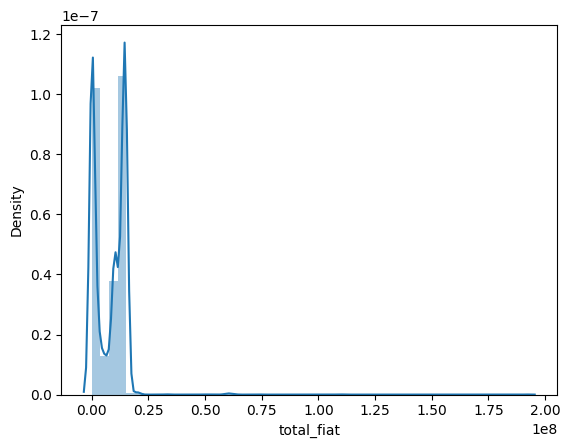

In [77]:
sns.distplot(df1['total_fiat'].dropna())

/tmp/ipykernel_4581/3241616336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['min_active'])


<Axes: xlabel='min_active', ylabel='Density'>

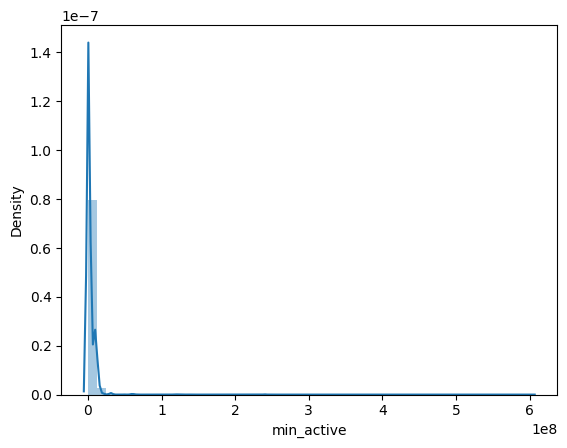

In [83]:
sns.distplot(df1['min_active'])

/tmp/ipykernel_4581/4037814100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['min_active'].dropna())


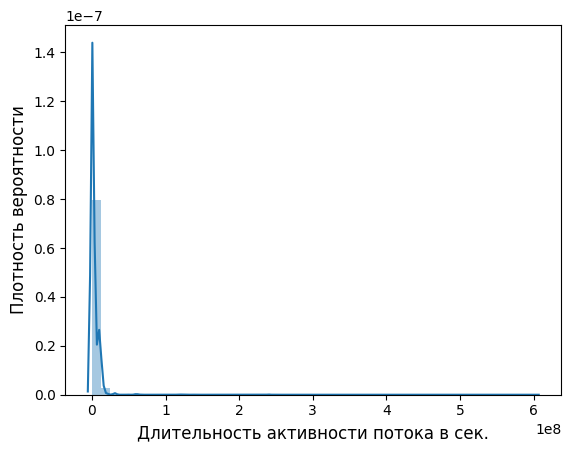

In [92]:
sns.distplot(df1['min_active'].dropna())
plt.xlabel('Длительность активности потока в сек.',  fontsize=12)
plt.ylabel('Плотность вероятности',  fontsize=12)
#plt.title('Распределение длительности активности')
plt.show()

In [88]:
df1.min_active

0             -1.0
1             -1.0
2        5816127.0
3        5068736.0
4             -1.0
           ...    
9788          -1.0
9789          -1.0
9790          -1.0
9791          -1.0
9792    10002496.0
Name: min_active, Length: 9793, dtype: float64

In [94]:
correlation_matrix = df1.iloc[:, :23].corr()

# Выведите корреляционную матрицу
print(correlation_matrix)

                    duration  total_fiat  total_biat  min_fiat  min_biat  \
duration            1.000000    0.508756    0.947431  0.034997  0.042326   
total_fiat          0.508756    1.000000    0.365406  0.093744  0.104119   
total_biat          0.947431    0.365406    1.000000  0.035524  0.054761   
min_fiat            0.034997    0.093744    0.035524  1.000000  0.901881   
min_biat            0.042326    0.104119    0.054761  0.901881  1.000000   
max_fiat            0.316256    0.608947    0.092029  0.382884  0.392785   
max_biat            0.848551    0.066366    0.886578  0.157243  0.177862   
mean_fiat           0.115221    0.244045    0.049661  0.942993  0.899982   
mean_biat           0.216464    0.123082    0.236136  0.836832  0.927432   
flowPktsPerSecond  -0.084406   -0.138538   -0.082306 -0.042654 -0.042400   
flowBytesPerSecond -0.084662   -0.137562   -0.082153 -0.048860 -0.048570   
min_flowiat        -0.015009   -0.026913   -0.055540  0.165220 -0.006483   
max_flowiat 

In [95]:
corr = df1.iloc[:, :23].corr()
corr.style.background_gradient(cmap='coolwarm')

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,min_flowiat,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
duration,1.000000,0.508756,0.947431,0.034997,0.042326,0.316256,0.848551,0.115221,0.216464,-0.084406,-0.084662,-0.015009,0.894171,0.306613,0.628114,0.841114,0.880643,0.898144,0.302271,0.836421,0.874887,0.892172,0.298006
total_fiat,0.508756,1.000000,0.365406,0.093744,0.104119,0.608947,0.066366,0.244045,0.123082,-0.138538,-0.137562,-0.026913,0.221434,0.212090,0.284216,0.206385,0.225240,0.242524,0.123895,0.188301,0.204928,0.221179,0.113007
total_biat,0.947431,0.365406,1.000000,0.035524,0.054761,0.092029,0.886578,0.049661,0.236136,-0.082306,-0.082153,-0.055540,0.823722,0.221396,0.526020,0.769437,0.809118,0.828236,0.297617,0.764447,0.803153,0.821650,0.292484
min_fiat,0.034997,0.093744,0.035524,1.000000,0.901881,0.382884,0.157243,0.942993,0.836832,-0.042654,-0.048860,0.165220,0.152665,0.770322,0.522619,0.170882,0.158669,0.142306,-0.054923,0.181111,0.170851,0.154673,-0.048599
min_biat,0.042326,0.104119,0.054761,0.901881,1.000000,0.392785,0.177862,0.899982,0.927432,-0.042400,-0.048570,-0.006483,0.159098,0.714881,0.548571,0.178421,0.165985,0.149148,-0.056095,0.188385,0.177833,0.161202,-0.049945
max_fiat,0.316256,0.608947,0.092029,0.382884,0.392785,1.000000,0.191234,0.601452,0.426216,-0.072560,-0.079117,0.045454,0.417853,0.555542,0.615028,0.396322,0.413445,0.423901,0.135150,0.391801,0.409532,0.421896,0.141410
max_biat,0.848551,0.066366,0.886578,0.157243,0.177862,0.191234,1.000000,0.182451,0.375900,-0.036066,-0.039247,-0.021621,0.942703,0.364554,0.675056,0.884342,0.922540,0.936482,0.301906,0.888181,0.927323,0.942497,0.307681
mean_fiat,0.115221,0.244045,0.049661,0.942993,0.899982,0.601452,0.182451,1.000000,0.870257,-0.055945,-0.063962,0.151335,0.244936,0.852551,0.650238,0.258278,0.250473,0.236310,-0.023065,0.267250,0.261271,0.247625,-0.016413
mean_biat,0.216464,0.123082,0.236136,0.836832,0.927432,0.426216,0.375900,0.870257,1.000000,-0.053632,-0.061368,-0.016051,0.345119,0.813087,0.749429,0.339950,0.342717,0.336071,0.048295,0.349054,0.353654,0.347450,0.054846
flowPktsPerSecond,-0.084406,-0.138538,-0.082306,-0.042654,-0.042400,-0.072560,-0.036066,-0.055945,-0.053632,1.000000,0.801251,-0.012741,-0.037632,-0.058290,-0.051403,-0.033585,-0.037126,-0.040348,-0.022931,-0.030036,-0.033174,-0.036056,-0.020535


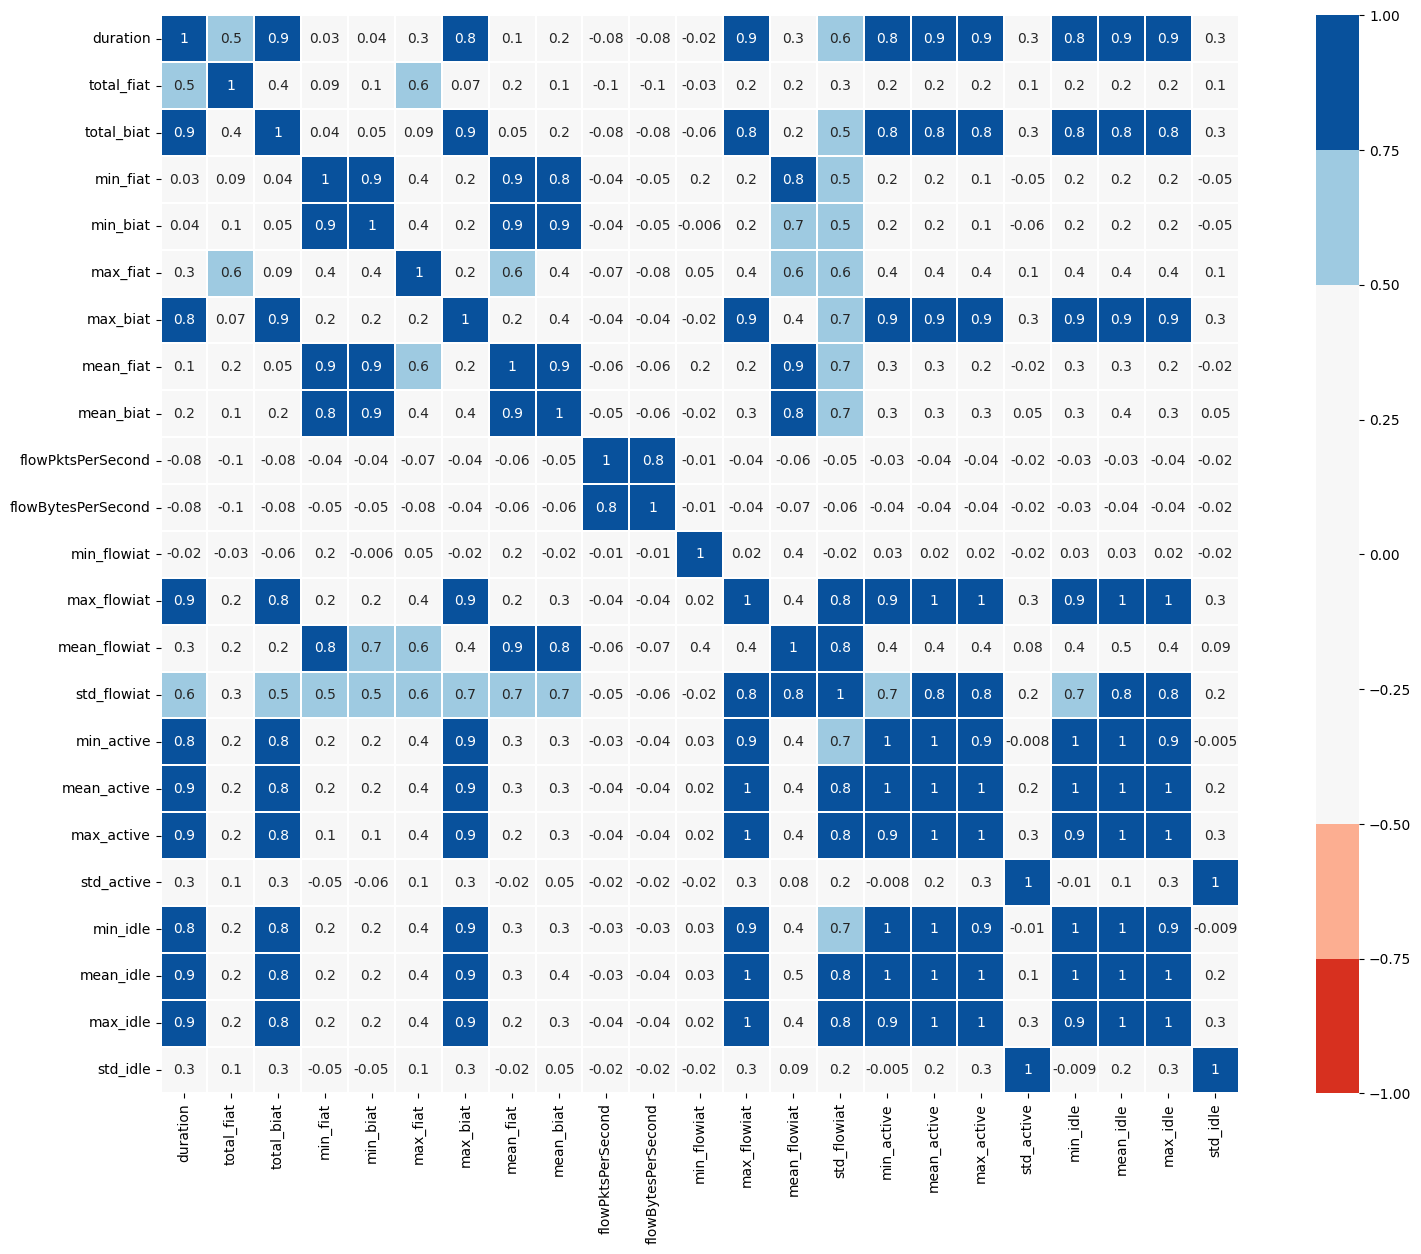

In [96]:
# Создание новой цветовой карты для подсвечивания сильных связей
color_map = sns.color_palette(['#d7301f', '#fcae91', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#9ecae1', '#08519c'])

# Определение размера диаграммы
plt.figure(figsize=(20, 14))

# Вывод корреляционной матрицы
ax = sns.heatmap(
    df1.iloc[:, :23].corr(), cmap=color_map, square=True, vmin=-1, vmax=1, center= 0,
    linewidths=0.1, linecolor='white', annot=True, fmt='.1g', 
    cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=25))

# Вывод диаграммы
plt.show()

In [ ]:
df1.flowBytesPerSecond
df1.flowPktsPerSecond
df1.min_flowiat
df1.duration
df1.std_flowiat

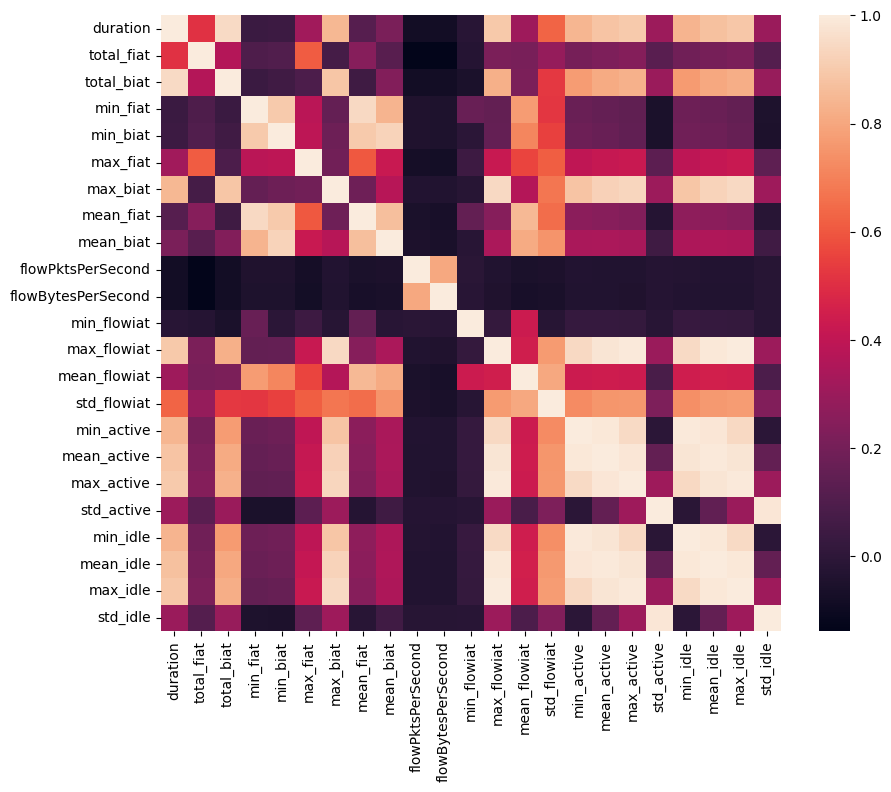

In [105]:
# Вычислите корреляционную матрицу
correlation_matrix = df1.iloc[:, :23].corr()

# Установите размер изображения
plt.figure(figsize=(10, 8))

# Постройте график корреляционной матрицы
sns.heatmap(correlation_matrix)

# Настройте подписи осей
# plt.xlabel('Признаки')
# plt.ylabel('Признаки')
# plt.title('Корреляционная матрица')

# Показать график
plt.show()

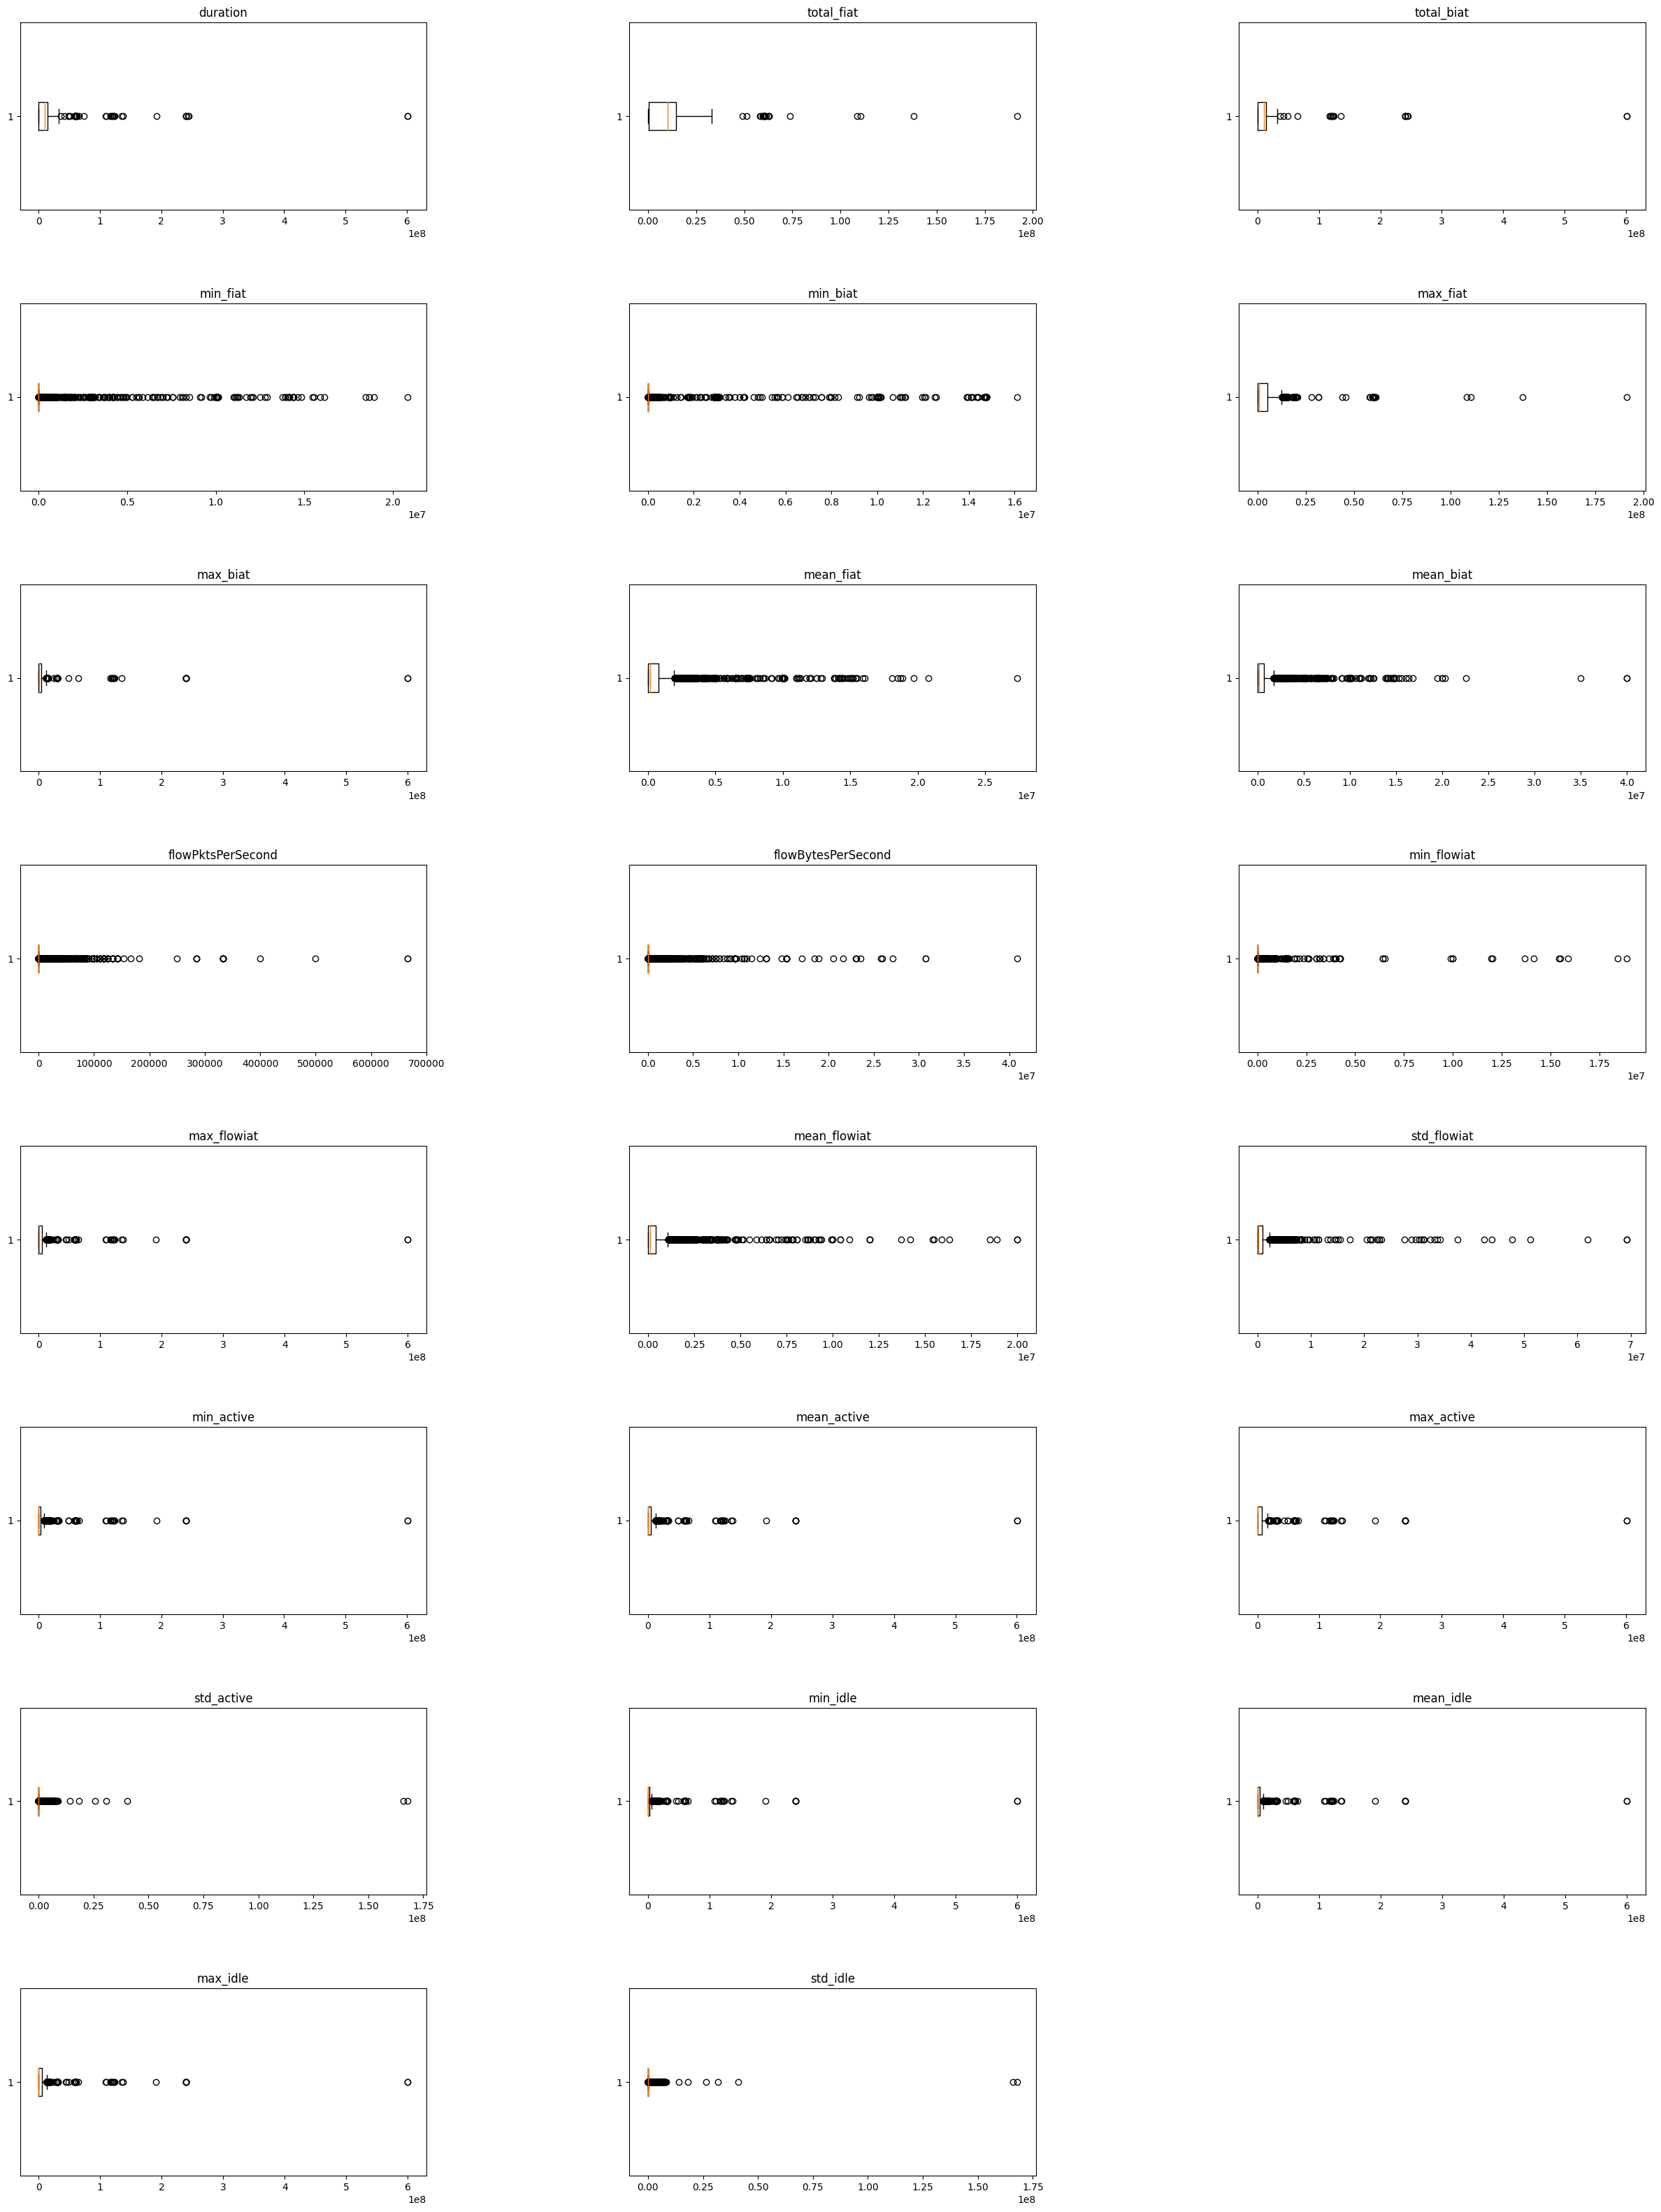

In [12]:
# Создание объекта figure и задание его размера
fig = plt.figure(figsize=(30, 40))

# Указание горизонтального и вертикального расстояния между графиками
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# В цикле от 1 до 6 (для шести подграфиков)
for i, column in enumerate(df1.columns):
    # Поочередно создаем каждый подграфик
    # Параметры задают сетку, в переменной i содержится индекс подграфика
    if column !='class1':

        ax = fig.add_subplot(8, 3, i+1)

        # Построение boxplot'а для столбца
        ax.boxplot(df1[column],vert=False)

        # Задаем название графика равным названию столбца
        ax.set_title(column)

# Отображение графиков
plt.show()

## Выявление и удаление выбросов:

### Статистические методы

In [13]:
z = stats.zscore(df1.iloc[:, :23])
z

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
0,-0.502066,-0.803350,-0.481747,-0.333487,-0.331486,-0.559210,-0.276126,-0.437374,-0.419318,0.096685,...,-0.455810,-0.401538,-0.263869,-0.291751,-0.317098,-0.180351,-0.235699,-0.260399,-0.283066,-0.161405
1,-0.402320,-0.620710,-0.393327,-0.333488,-0.331489,-0.510533,-0.264885,-0.437086,-0.419105,-0.042155,...,-0.455496,-0.398794,-0.263869,-0.291751,-0.317098,-0.180351,-0.235699,-0.260399,-0.283066,-0.161405
2,0.369128,0.739333,0.412599,-0.333490,-0.331492,0.150445,0.051058,-0.433837,-0.417681,-0.113181,...,-0.453055,-0.377212,0.227479,0.194087,0.150435,-0.180351,0.086361,0.058101,0.023663,-0.161405
3,0.455828,0.900900,0.502488,-0.333489,-0.331487,-0.118844,-0.077462,-0.432001,-0.417244,-0.116727,...,-0.452123,-0.382397,0.164339,0.162270,0.149277,0.011070,-0.138390,-0.116375,-0.098341,0.138319
4,-0.651614,-1.077092,-0.636732,-0.333485,-0.331488,-0.565311,-0.277799,-0.437376,-0.419320,0.067958,...,-0.455781,-0.401219,-0.263869,-0.291751,-0.317098,-0.180351,-0.235699,-0.260399,-0.283066,-0.161405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,-0.672355,-1.105140,-0.656139,-0.333491,-0.331492,-0.570320,-0.283498,-0.437586,-0.419443,-0.127939,...,-0.456003,-0.402235,-0.263869,-0.291751,-0.317098,-0.180351,-0.235699,-0.260399,-0.283066,-0.161405
9789,-0.672287,-1.105140,-0.656139,-0.333491,-0.331492,-0.570320,-0.283498,-0.437586,-0.419443,-0.011631,...,-0.455255,-0.402235,-0.263869,-0.291751,-0.317098,-0.180351,-0.235699,-0.260399,-0.283066,-0.161405
9790,-0.672355,-1.105140,-0.656139,-0.333491,-0.331492,-0.570320,-0.283498,-0.437586,-0.419443,-0.127939,...,-0.456003,-0.402235,-0.263869,-0.291751,-0.317098,-0.180351,-0.235699,-0.260399,-0.283066,-0.161405
9791,-0.672355,-1.105140,-0.656139,-0.333491,-0.331492,-0.570320,-0.283498,-0.437586,-0.419443,-0.127939,...,-0.456003,-0.402235,-0.263869,-0.291751,-0.317098,-0.180351,-0.235699,-0.260399,-0.283066,-0.161405


In [14]:
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), 
# где хотя бы одно значение True (т.е. > 3)

df1[(np.abs(z) > 3).any(axis = 1)]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
21,601185075.0,1114228.0,600965621.0,20.0,22.0,224169.0,600070854.0,1.172872e+04,5.834618e+06,0.332676,...,4.250000e+07,601185075.0,601000000.0,601185075.0,0.0,600070847.0,600000000.0,600070847.0,0.0,VPN-BROWSING
22,601404954.0,1295300.0,601185122.0,12.0,14.0,406429.0,600109667.0,1.579634e+04,5.836749e+06,0.310939,...,4.400000e+07,601404954.0,601000000.0,601404954.0,0.0,600109654.0,600000000.0,600109654.0,0.0,VPN-BROWSING
27,243280799.0,3287480.0,243252392.0,30.0,10.0,2426318.0,239993334.0,8.018244e+04,3.378505e+06,0.472705,...,2.250000e+07,2628586.0,122000000.0,240652213.0,168000000.0,2426318.0,121000000.0,239993319.0,168000000.0,VPN-BROWSING
54,240149773.0,200344.0,240124018.0,31.0,9.0,65221.0,239949444.0,9.540190e+03,6.157026e+06,0.258172,...,3.070000e+07,240149773.0,240000000.0,240149773.0,0.0,239949429.0,240000000.0,239949429.0,0.0,VPN-BROWSING
61,59694404.0,59694404.0,107258.0,142.0,0.0,59564322.0,80484.0,4.974534e+06,3.830643e+03,0.703584,...,9.301882e+06,59694404.0,59700000.0,59694404.0,0.0,59564322.0,59600000.0,59564322.0,0.0,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,10079177.0,10039201.0,10040084.0,10039201.0,10040084.0,10039201.0,10040084.0,1.000000e+07,1.000000e+07,0.396858,...,5.750740e+06,10039201.0,10000000.0,10039201.0,0.0,10000108.0,10000000.0,10000108.0,0.0,VPN-VOIP
9490,16122527.0,16122527.0,0.0,16122527.0,-1.0,16122527.0,-1.0,1.610000e+07,0.000000e+00,0.186075,...,1.140000e+07,16122527.0,16100000.0,16122527.0,0.0,16121389.0,16100000.0,16121389.0,0.0,VPN-VOIP
9497,10002251.0,10002251.0,0.0,10002251.0,-1.0,10002251.0,-1.0,1.000000e+07,0.000000e+00,0.199955,...,0.000000e+00,10002251.0,10000000.0,10002251.0,0.0,10002251.0,10000000.0,10002251.0,0.0,VPN-VOIP
9785,16122675.0,0.0,16122675.0,-1.0,16122675.0,-1.0,16122675.0,0.000000e+00,1.610000e+07,0.186073,...,1.140000e+07,16122675.0,16100000.0,16122675.0,0.0,16122615.0,16100000.0,16122615.0,0.0,VPN-VOIP


In [15]:
# найдем границы 1.5 * IQR по каждому столбцу
#df1 = df1.iloc[:, :23]
Q1 = df1.iloc[:, :23].quantile(0.25)
Q3 = df1.iloc[:, :23].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
 
# создадим маску для выбросов 
# (если хотя бы один выброс в строке (True), метод .any() сделает всю строку True
mask_out = ((df1.iloc[:, :23] < lower) | (df1.iloc[:, :23] > upper)).any(axis = 1)

In [16]:
# возьмем датафрейм без выбросов
df1[mask_out]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,3.700094e+02,4315.726934,...,1.815741e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,9.989129e+02,1648.183118,...,8.971722e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5.204311e+03,283.541956,...,6.525644e+04,5816127.0,5.816127e+06,5816127.0,0.000000e+00,3777807.0,3777807.0,3777807.0,0.000000e+00,VPN-BROWSING
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6.497647e+03,215.416324,...,5.173538e+04,5068736.0,5.435234e+06,5801731.0,5.183057e+05,1141447.0,1708300.0,2275153.0,8.016512e+05,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,3.631042e+02,3763.781101,...,2.648294e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,16122675.0,0.0,16122675.0,-1.0,16122675.0,-1.0,16122675.0,0.000000e+00,1.610000e+07,0.186073,...,1.140000e+07,16122675.0,1.610000e+07,16122675.0,0.000000e+00,16122615.0,16100000.0,16122615.0,0.000000e+00,VPN-VOIP
9786,13564911.0,13212986.0,5859008.0,350191.0,5859008.0,7209098.0,5859008.0,2.642597e+06,5.859008e+06,0.589757,...,1.899257e+06,1702015.0,3.391228e+06,5859008.0,1.936448e+06,1702015.0,3102977.5,5507083.0,1.728785e+06,VPN-VOIP
9787,12826739.0,12826739.0,0.0,350190.0,-1.0,6822863.0,-1.0,2.565348e+06,0.000000e+00,0.467773,...,2.656475e+06,2001173.0,4.275580e+06,6822863.0,2.422400e+06,2001173.0,4008554.0,6822863.0,2.510084e+06,VPN-VOIP
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000e+00,2234.636872,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP


In [17]:
# фильтрация не аномальных значений
outlier_values4 = df1[mask_out]
outlier_values4

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,3.700094e+02,4315.726934,...,1.815741e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,9.989129e+02,1648.183118,...,8.971722e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5.204311e+03,283.541956,...,6.525644e+04,5816127.0,5.816127e+06,5816127.0,0.000000e+00,3777807.0,3777807.0,3777807.0,0.000000e+00,VPN-BROWSING
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6.497647e+03,215.416324,...,5.173538e+04,5068736.0,5.435234e+06,5801731.0,5.183057e+05,1141447.0,1708300.0,2275153.0,8.016512e+05,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,3.631042e+02,3763.781101,...,2.648294e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,16122675.0,0.0,16122675.0,-1.0,16122675.0,-1.0,16122675.0,0.000000e+00,1.610000e+07,0.186073,...,1.140000e+07,16122675.0,1.610000e+07,16122675.0,0.000000e+00,16122615.0,16100000.0,16122615.0,0.000000e+00,VPN-VOIP
9786,13564911.0,13212986.0,5859008.0,350191.0,5859008.0,7209098.0,5859008.0,2.642597e+06,5.859008e+06,0.589757,...,1.899257e+06,1702015.0,3.391228e+06,5859008.0,1.936448e+06,1702015.0,3102977.5,5507083.0,1.728785e+06,VPN-VOIP
9787,12826739.0,12826739.0,0.0,350190.0,-1.0,6822863.0,-1.0,2.565348e+06,0.000000e+00,0.467773,...,2.656475e+06,2001173.0,4.275580e+06,6822863.0,2.422400e+06,2001173.0,4008554.0,6822863.0,2.510084e+06,VPN-VOIP
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000e+00,2234.636872,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP


In [18]:
# распределение аномальных объектов по классам
df1[~mask_out].iloc[:, 23:].value_counts()

class1       
VPN-VOIP         980
VPN-BROWSING     632
VPN-FT           368
VPN-P2P          315
VPN-MAIL         203
VPN-CHAT         157
VPN-STREAMING      1
Name: count, dtype: int64

### Методы, основанные на моделях

In [19]:
# Модель OneClassSVM с порогом 1% на аномальные значения
model1 = OneClassSVM(kernel = 'rbf', nu=0.001)


model1.fit(df1.iloc[:, :23])

OneClassSVM(nu=0.001)

In [20]:
y_pred = model1.predict(df1.iloc[:, :23])
y_pred

array([ 1,  1,  1, ..., -1, -1,  1])

In [21]:
# фильтрация не аномальных значений
outlier_index = np.where(y_pred == 1) 
# filter outlier values
outlier_values = df1.iloc[outlier_index]
outlier_values

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,3.700094e+02,4315.726934,...,1.815741e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,9.989129e+02,1648.183118,...,8.971722e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5.204311e+03,283.541956,...,6.525644e+04,5816127.0,5.816127e+06,5816127.0,0.000000e+00,3777807.0,3777807.0,3777807.0,0.000000e+00,VPN-BROWSING
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6.497647e+03,215.416324,...,5.173538e+04,5068736.0,5.435234e+06,5801731.0,5.183057e+05,1141447.0,1708300.0,2275153.0,8.016512e+05,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,3.631042e+02,3763.781101,...,2.648294e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,10400813.0,10048651.0,10349372.0,402296.0,300586.0,9646355.0,10048786.0,5.024326e+06,5.174686e+06,0.576878,...,4.231912e+06,9998517.0,9.998517e+06,9998517.0,0.000000e+00,9646355.0,9646355.0,9646355.0,0.000000e+00,VPN-VOIP
9786,13564911.0,13212986.0,5859008.0,350191.0,5859008.0,7209098.0,5859008.0,2.642597e+06,5.859008e+06,0.589757,...,1.899257e+06,1702015.0,3.391228e+06,5859008.0,1.936448e+06,1702015.0,3102977.5,5507083.0,1.728785e+06,VPN-VOIP
9787,12826739.0,12826739.0,0.0,350190.0,-1.0,6822863.0,-1.0,2.565348e+06,0.000000e+00,0.467773,...,2.656475e+06,2001173.0,4.275580e+06,6822863.0,2.422400e+06,2001173.0,4008554.0,6822863.0,2.510084e+06,VPN-VOIP
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000e+00,2234.636872,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP


In [22]:
# распределение аномальных объектов по классам
df1.iloc[np.where(y_pred == -1)].iloc[:, 23:].value_counts()

class1       
VPN-VOIP         547
VPN-P2P          264
VPN-CHAT          33
VPN-FT            26
VPN-BROWSING       7
VPN-MAIL           2
VPN-STREAMING      2
Name: count, dtype: int64

In [23]:
# Изолирующей лес
model2= IsolationForest(contamination=0.001, n_jobs=-1, )
model2.fit(df1.iloc[:, :23])

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001, n_jobs=-1)

In [24]:
y_pred2 = model2.predict(df1.iloc[:, :23])
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
# фильтрация не аномальных значений
outlier_index2 = np.where(y_pred2 == 1) 

# filter outlier values
outlier_values2 = df1.iloc[outlier_index2]
outlier_values2

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,1815.741336,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,998.912938,1648.183118,...,8971.721519,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5204.310999,283.541956,...,65256.442153,5816127.0,5816127.0,5816127.0,0.000000,3777807.0,3777807.0,3777807.0,0.000000,VPN-BROWSING
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6497.646744,215.416324,...,51735.382672,5068736.0,5435233.5,5801731.0,518305.735075,1141447.0,1708300.0,2275153.0,801651.200471,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2648.293598,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9790,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9791,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP


In [26]:
# распределение аномальных объектов по классам
df1.iloc[np.where(y_pred2 == -1)].iloc[:, 23:].value_counts()

class1      
VPN-BROWSING    10
Name: count, dtype: int64

In [27]:
#эллипсоидальная аппроксимация данных (EllipticEnvelope)
model3 = EllipticEnvelope(random_state=17, contamination=0.01)
model3.fit(df1.iloc[:, :23])

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (469.645789434956271 > 370.546966738936248). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (491.578771796341357 > 405.590851948013551). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (514.175362989096925 > 416.106490337073637). You may want to try with a hig

EllipticEnvelope(contamination=0.01, random_state=17)

In [28]:
y_pred3 = model3.predict(df1.iloc[:, :23])
y_pred3

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
# фильтрация не аномальных значений
outlier_index3 = np.where(y_pred3 == 1) 

# filter outlier values
outlier_values3 = df1.iloc[outlier_index3]
outlier_values3

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,1815.741336,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,998.912938,1648.183118,...,8971.721519,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5204.310999,283.541956,...,65256.442153,5816127.0,5816127.0,5816127.0,0.000000,3777807.0,3777807.0,3777807.0,0.000000,VPN-BROWSING
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6497.646744,215.416324,...,51735.382672,5068736.0,5435233.5,5801731.0,518305.735075,1141447.0,1708300.0,2275153.0,801651.200471,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2648.293598,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9790,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9791,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP


In [30]:
# распределение аномальных объектов по классам
df1.iloc[np.where(y_pred3 == -1)].iloc[:, 23:].value_counts()

class1       
VPN-FT           72
VPN-CHAT         12
VPN-BROWSING      9
VPN-P2P           3
VPN-MAIL          1
VPN-STREAMING     1
Name: count, dtype: int64

## Разбиение данных

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, :23], df1['class1'], 
                                                    test_size=0.2, random_state=42,
                                                   stratify=df1['class1'])

### Обучение моделей на очищенных данных

In [32]:
model_ml1 =  LogisticRegression(random_state=17, n_jobs=-1)

In [33]:
x_train1 = outlier_values.iloc[:, :23]
y_train1 = outlier_values['class1']
x_train1

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,3.700094e+02,4315.726934,...,2.317349e+02,1.815741e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,9.989129e+02,1648.183118,...,6.068334e+02,8.971722e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5.204311e+03,283.541956,...,3.527732e+03,6.525644e+04,5816127.0,5.816127e+06,5816127.0,0.000000e+00,3777807.0,3777807.0,3777807.0,0.000000e+00
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6.497647e+03,215.416324,...,4.643640e+03,5.173538e+04,5068736.0,5.435234e+06,5801731.0,5.183057e+05,1141447.0,1708300.0,2275153.0,8.016512e+05
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,3.631042e+02,3763.781101,...,2.659518e+02,2.648294e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,10400813.0,10048651.0,10349372.0,402296.0,300586.0,9646355.0,10048786.0,5.024326e+06,5.174686e+06,0.576878,...,2.080163e+06,4.231912e+06,9998517.0,9.998517e+06,9998517.0,0.000000e+00,9646355.0,9646355.0,9646355.0,0.000000e+00
9786,13564911.0,13212986.0,5859008.0,350191.0,5859008.0,7209098.0,5859008.0,2.642597e+06,5.859008e+06,0.589757,...,1.937844e+06,1.899257e+06,1702015.0,3.391228e+06,5859008.0,1.936448e+06,1702015.0,3102977.5,5507083.0,1.728785e+06
9787,12826739.0,12826739.0,0.0,350190.0,-1.0,6822863.0,-1.0,2.565348e+06,0.000000e+00,0.467773,...,2.565348e+06,2.656475e+06,2001173.0,4.275580e+06,6822863.0,2.422400e+06,2001173.0,4008554.0,6822863.0,2.510084e+06
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000e+00,2234.636872,...,8.950000e+02,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00


In [34]:
model_ml1.fit(x_train1, y_train1)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=17)

In [35]:
y_pred_ml1 = model_ml1.predict(X_test) 
print(classification_report(y_test, y_pred_ml1, digits=5))

               precision    recall  f1-score   support

 VPN-BROWSING    0.71028   0.45600   0.55542       500
     VPN-CHAT    0.59873   0.39331   0.47475       239
       VPN-FT    0.37335   0.73127   0.49432       387
     VPN-MAIL    0.33766   0.26531   0.29714        98
      VPN-P2P    0.00000   0.00000   0.00000       186
VPN-STREAMING    0.56604   0.31579   0.40541        95
     VPN-VOIP    0.74874   0.97797   0.84814       454

     accuracy                        0.56406      1959
    macro avg    0.47640   0.44852   0.43931      1959
 weighted avg    0.54595   0.56406   0.52842      1959



/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [36]:
model_ml2 =  LogisticRegression(random_state=17, n_jobs=-1)

In [37]:
x_train2 = outlier_values2.iloc[:, :23]
y_train2 = outlier_values2['class1']
x_train2

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,2.317349e+02,1815.741336,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,998.912938,1648.183118,...,6.068334e+02,8971.721519,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5204.310999,283.541956,...,3.527732e+03,65256.442153,5816127.0,5816127.0,5816127.0,0.000000,3777807.0,3777807.0,3777807.0,0.000000
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6497.646744,215.416324,...,4.643640e+03,51735.382672,5068736.0,5435233.5,5801731.0,518305.735075,1141447.0,1708300.0,2275153.0,801651.200471
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2.659518e+02,2648.293598,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,8.950000e+02,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
9790,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
9791,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000


In [38]:
model_ml2.fit(x_train2, y_train2)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=17)

In [39]:
y_pred_ml2 = model_ml2.predict(X_test) 
print(classification_report(y_test, y_pred_ml2, digits=5))

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

 VPN-BROWSING    0.72013   0.45800   0.55990       500
     VPN-CHAT    0.59880   0.41841   0.49261       239
       VPN-FT    0.37441   0.81654   0.51340       387
     VPN-MAIL    0.00000   0.00000   0.00000        98
      VPN-P2P    0.00000   0.00000   0.00000       186
VPN-STREAMING    0.57143   0.25263   0.35036        95
     VPN-VOIP    0.75300   0.96696   0.84667       454

     accuracy                        0.56559      1959
    macro avg    0.43111   0.41608   0.39471      1959
 weighted avg    0.53304   0.56559   0.51763      1959



/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
model_ml3 =  LogisticRegression(random_state=17, n_jobs=-1)

In [41]:
x_train3 = outlier_values3.iloc[:, :23]
y_train3 = outlier_values3['class1']
x_train3

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,2.317349e+02,1815.741336,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,998.912938,1648.183118,...,6.068334e+02,8971.721519,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5204.310999,283.541956,...,3.527732e+03,65256.442153,5816127.0,5816127.0,5816127.0,0.000000,3777807.0,3777807.0,3777807.0,0.000000
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6497.646744,215.416324,...,4.643640e+03,51735.382672,5068736.0,5435233.5,5801731.0,518305.735075,1141447.0,1708300.0,2275153.0,801651.200471
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2.659518e+02,2648.293598,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,8.950000e+02,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
9790,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000
9791,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000


In [42]:
model_ml3.fit(x_train3, y_train3)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=17)

In [43]:
y_pred_ml3 = model_ml3.predict(X_test) 
print(classification_report(y_test, y_pred_ml3, digits=5))

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

 VPN-BROWSING    0.72555   0.46000   0.56304       500
     VPN-CHAT    0.55932   0.41423   0.47596       239
       VPN-FT    0.37393   0.79328   0.50828       387
     VPN-MAIL    0.00000   0.00000   0.00000        98
      VPN-P2P    0.00000   0.00000   0.00000       186
VPN-STREAMING    0.60465   0.27368   0.37681        95
     VPN-VOIP    0.74450   0.96916   0.84211       454

     accuracy                        0.56253      1959
    macro avg    0.42971   0.41576   0.39517      1959
 weighted avg    0.52915   0.56253   0.51561      1959



/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
model_ml4 =  LogisticRegression(random_state=17, n_jobs=-1)

In [45]:
x_train4 = outlier_values4.iloc[:, :23]
y_train4 = outlier_values4['class1']
x_train4

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,3.700094e+02,4315.726934,...,2.317349e+02,1.815741e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,9.989129e+02,1648.183118,...,6.068334e+02,8.971722e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5.204311e+03,283.541956,...,3.527732e+03,6.525644e+04,5816127.0,5.816127e+06,5816127.0,0.000000e+00,3777807.0,3777807.0,3777807.0,0.000000e+00
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6.497647e+03,215.416324,...,4.643640e+03,5.173538e+04,5068736.0,5.435234e+06,5801731.0,5.183057e+05,1141447.0,1708300.0,2275153.0,8.016512e+05
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,3.631042e+02,3763.781101,...,2.659518e+02,2.648294e+03,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,16122675.0,0.0,16122675.0,-1.0,16122675.0,-1.0,16122675.0,0.000000e+00,1.610000e+07,0.186073,...,8.061338e+06,1.140000e+07,16122675.0,1.610000e+07,16122675.0,0.000000e+00,16122615.0,16100000.0,16122615.0,0.000000e+00
9786,13564911.0,13212986.0,5859008.0,350191.0,5859008.0,7209098.0,5859008.0,2.642597e+06,5.859008e+06,0.589757,...,1.937844e+06,1.899257e+06,1702015.0,3.391228e+06,5859008.0,1.936448e+06,1702015.0,3102977.5,5507083.0,1.728785e+06
9787,12826739.0,12826739.0,0.0,350190.0,-1.0,6822863.0,-1.0,2.565348e+06,0.000000e+00,0.467773,...,2.565348e+06,2.656475e+06,2001173.0,4.275580e+06,6822863.0,2.422400e+06,2001173.0,4008554.0,6822863.0,2.510084e+06
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000e+00,2234.636872,...,8.950000e+02,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00


In [46]:
model_ml4.fit(x_train4, y_train4)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=17)

In [47]:
y_pred_ml4 = model_ml4.predict(X_test) 
print(classification_report(y_test, y_pred_ml4, digits=5))

               precision    recall  f1-score   support

 VPN-BROWSING    0.73770   0.45000   0.55901       500
     VPN-CHAT    0.56667   0.42678   0.48687       239
       VPN-FT    0.34136   0.62274   0.44099       387
     VPN-MAIL    0.19286   0.27551   0.22689        98
      VPN-P2P    0.80000   0.02151   0.04188       186
VPN-STREAMING    0.20820   0.69474   0.32039        95
     VPN-VOIP    0.78105   0.52643   0.62895       454

     accuracy                        0.46146      1959
    macro avg    0.51826   0.43110   0.38643      1959
 weighted avg    0.60157   0.46146   0.46582      1959



In [49]:
df1

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,1815.741336,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,998.912938,1648.183118,...,8971.721519,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5204.310999,283.541956,...,65256.442153,5816127.0,5816127.0,5816127.0,0.000000,3777807.0,3777807.0,3777807.0,0.000000,VPN-BROWSING
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6497.646744,215.416324,...,51735.382672,5068736.0,5435233.5,5801731.0,518305.735075,1141447.0,1708300.0,2275153.0,801651.200471,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2648.293598,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9790,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9791,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP


## Анализ целевой переменной

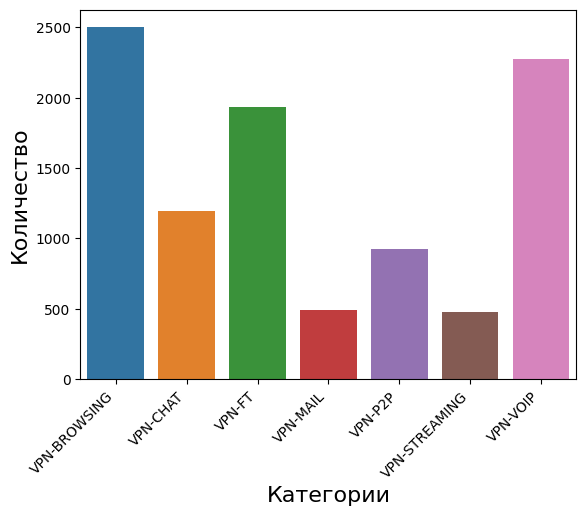

In [50]:
sns.countplot(x="class1", data=df1)
plt.xlabel('Категории', fontsize=16)
plt.ylabel('Количество', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

## Устранения дисбаланса классов

In [51]:
df1.class1.unique()

array(['VPN-BROWSING', 'VPN-CHAT', 'VPN-FT', 'VPN-MAIL', 'VPN-P2P',
       'VPN-STREAMING', 'VPN-VOIP'], dtype=object)

In [52]:
# Установка долей для каждого класса
sampling_strategy = {
    'VPN-CHAT': 800,
    'VPN-FT': 200,
    'VPN-MAIL': 1800,
    'VPN-P2P': 1000,
    'VPN-STREAMING':1500 
}


In [64]:
# Создание объекта SMOTE с указанными долями
smote = SMOTE( random_state=42, n_jobs=-1, k_neighbors=4)

# Применение SMOTE к данным
X_1, y_1 = smote.fit_resample(df1.iloc[:, :23], df1['class1'])


# Соединение по горизонтали (добавление столбцов)
combined_df1 = pd.concat([X_1, y_1], axis=1)
combined_df1.to_csv('Dataset_15s.csv', index=False)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [65]:
# Создание объекта SMOTE с указанными долями
smote = SMOTE( random_state=42, n_jobs=-1, k_neighbors=4)

# Применение SMOTE к данным
X_2, y_2 = smote.fit_resample(df2.iloc[:, :23], df2['class1'])

# Соединение по горизонтали (добавление столбцов)
combined_df2 = pd.concat([X_2, y_2], axis=1)
combined_df2.to_csv('Dataset_30s.csv', index=False)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [66]:
# Создание объекта SMOTE с указанными долями
smote = SMOTE( random_state=42, n_jobs=-1, k_neighbors=4)

# Применение SMOTE к данным
X_3, y_3 = smote.fit_resample(df3.iloc[:, :23], df3['class1'])

# Соединение по горизонтали (добавление столбцов)
combined_df3 = pd.concat([X_3, y_3], axis=1)
combined_df3.to_csv('Dataset_60s.csv', index=False)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [67]:
# Создание объекта SMOTE с указанными долями
smote = SMOTE(random_state=42, n_jobs=-1, k_neighbors=4)

# Применение SMOTE к данным
X_4, y_4 = smote.fit_resample(df4.iloc[:, :23], df4['class1'])

# Соединение по горизонтали (добавление столбцов)
combined_df4 = pd.concat([X_4, y_4], axis=1)
combined_df4.to_csv('Dataset_120s.csv', index=False)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [58]:
X_1

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
0,2.218398e+06,2.191528e+06,2.192676e+06,9.000000e+00,1.700000e+01,6.021700e+04,8.611300e+04,6.010773e+02,3.700094e+02,4315.726934,...,2.317349e+02,1.815741e+03,-1.000000e+00,0.0,-1.000000e+00,0.000000,-1.000000e+00,0.0,-1.000000e+00,0.000000
1,3.517813e+06,3.517813e+06,3.304404e+06,6.000000e+00,7.000000e+00,3.240590e+05,2.174260e+05,1.413912e+03,9.989129e+02,1648.183118,...,6.068334e+02,8.971722e+03,-1.000000e+00,0.0,-1.000000e+00,0.000000,-1.000000e+00,0.0,-1.000000e+00,0.000000
2,1.356766e+07,1.339410e+07,1.343753e+07,0.000000e+00,0.000000e+00,3.906748e+06,3.908013e+06,1.060499e+04,5.204311e+03,283.541956,...,3.527732e+03,6.525644e+04,5.816127e+06,5816127.0,5.816127e+06,0.000000,3.777807e+06,3777807.0,3.777807e+06,0.000000
3,1.469712e+07,1.456736e+07,1.456772e+07,4.000000e+00,1.400000e+01,2.447126e+06,2.406746e+06,1.579974e+04,6.497647e+03,215.416324,...,4.643640e+03,5.173538e+04,5.068736e+06,5435233.5,5.801731e+06,518305.735075,1.141447e+06,1708300.0,2.275153e+06,801651.200471
4,2.702070e+05,2.036810e+05,2.440060e+05,1.500000e+01,1.000000e+01,2.714700e+04,6.657200e+04,5.938222e+02,3.631042e+02,3763.781101,...,2.659518e+02,2.648294e+03,-1.000000e+00,0.0,-1.000000e+00,0.000000,-1.000000e+00,0.0,-1.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,1.007837e+07,1.003960e+07,1.003950e+07,1.003960e+07,1.003950e+07,1.003960e+07,1.003950e+07,1.000000e+07,1.000000e+07,0.396889,...,3.359458e+06,5.751515e+06,1.003960e+07,10000000.0,1.003960e+07,0.000000,1.000073e+07,10000000.0,1.000073e+07,0.000000
17496,1.499752e+07,1.499752e+07,1.497976e+07,4.630470e+01,5.578967e+01,4.108009e+04,4.132499e+04,1.799657e+04,1.736143e+04,113.230712,...,8.836734e+03,6.037918e+03,-1.000000e+00,0.0,-1.000000e+00,0.000000,-1.000000e+00,0.0,-1.000000e+00,0.000000
17497,1.444437e+07,1.440558e+07,1.440538e+07,9.594038e+05,9.588016e+05,9.615126e+05,9.620966e+05,9.603720e+05,9.603586e+05,2.215395,...,4.659475e+05,4.483045e+05,-1.000000e+00,0.0,-1.000000e+00,0.000000,-1.000000e+00,0.0,-1.000000e+00,0.000000
17498,1.499481e+07,1.498200e+07,1.499476e+07,2.450284e+01,2.244129e+01,3.215041e+04,4.108724e+04,1.825345e+04,1.735843e+04,112.483998,...,8.895570e+03,6.638822e+03,-1.000000e+00,0.0,-1.000000e+00,0.000000,-1.000000e+00,0.0,-1.000000e+00,0.000000


In [68]:
df1

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,1815.741336,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,998.912938,1648.183118,...,8971.721519,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
2,13567657.0,13394098.0,13437531.0,0.0,0.0,3906748.0,3908013.0,1.060499e+04,5204.310999,283.541956,...,65256.442153,5816127.0,5816127.0,5816127.0,0.000000,3777807.0,3777807.0,3777807.0,0.000000,VPN-BROWSING
3,14697122.0,14567358.0,14567724.0,4.0,14.0,2447126.0,2406746.0,1.579974e+04,6497.646744,215.416324,...,51735.382672,5068736.0,5435233.5,5801731.0,518305.735075,1141447.0,1708300.0,2275153.0,801651.200471,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2648.293598,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9789,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9790,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP
9791,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,VPN-VOIP


In [69]:
df2

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,1.815741e+03,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
1,3517813.0,3517813.0,3304404.0,6.0,7.0,324059.0,217426.0,1.413912e+03,998.912938,1648.183118,...,8.971722e+03,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
2,24120341.0,23990439.0,23990943.0,4.0,14.0,4969763.0,4934103.0,1.923852e+04,8385.509612,170.395601,...,9.151675e+04,1498361.0,4762398.40,6401974.0,1.910100e+06,1115996.0,2109615.4,4800946.0,1.580859e+06,VPN-BROWSING
3,21936793.0,21807309.0,21806667.0,0.0,0.0,3906748.0,3908013.0,1.706362e+04,8367.869148,177.145310,...,9.490836e+04,1630161.0,5281245.75,11355159.0,4.444359e+06,1308911.0,2643748.5,3777807.0,1.233624e+06,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2.648294e+03,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,22829253.0,22829253.0,0.0,350190.0,-1.0,10002514.0,-1.0,3.804876e+06,0.000000,0.306624,...,3.855394e+06,2001173.0,5707313.25,10002514.0,3.480152e+06,2001173.0,5507044.0,10002514.0,3.630735e+06,VPN-VOIP
7730,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP
7731,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP
7732,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP


In [70]:
df3

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2218398.0,2191528.0,2192676.0,9.0,17.0,60217.0,86113.0,6.010773e+02,370.009450,4315.726934,...,1.815741e+03,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
1,48738520.0,48524188.0,48525131.0,6.0,7.0,45006375.0,45220727.0,1.949546e+04,14664.590813,119.002383,...,5.910799e+05,48524188.0,48500000.00,48524188.0,0.000000e+00,45006375.0,45000000.0,45006375.0,0.000000e+00,VPN-BROWSING
2,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2.648294e+03,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-BROWSING
3,59069229.0,59069229.0,59004989.0,23.0,10.0,58685690.0,58644456.0,1.911626e+05,86138.670073,16.861571,...,1.858312e+06,59004834.0,59000000.00,59004834.0,0.000000e+00,58618250.0,58600000.0,58618250.0,0.000000e+00,VPN-BROWSING
4,55595001.0,55424950.0,55464526.0,32.0,23.0,23772662.0,23731260.0,1.700152e+05,88038.930159,17.231765,...,1.023973e+06,15447930.0,18400000.00,24327021.0,5.106593e+06,14941349.0,17800000.0,23598957.0,4.979308e+06,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6930,22829253.0,22829253.0,0.0,350190.0,-1.0,10002514.0,-1.0,3.804876e+06,0.000000,0.306624,...,3.855394e+06,2001173.0,5707313.25,10002514.0,3.480152e+06,2001173.0,5507044.0,10002514.0,3.630735e+06,VPN-VOIP
6931,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP
6932,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP
6933,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000e+00,VPN-VOIP


In [71]:
df4

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,119364082.0,119364082.0,119338343.0,9.0,17.0,58714597.0,58776480.0,3.270249e+04,20131.299426,80.258649,...,8.456782e+05,58776675.0,59700000.00,60561891.0,1.262338e+06,58343493.0,5.850000e+07,58714597.0,2.624102e+05,VPN-BROWSING
1,93952224.0,93736153.0,93738835.0,6.0,7.0,45211965.0,45220727.0,3.764504e+04,28319.889728,61.754791,...,8.355672e+05,45211965.0,46900000.00,48524188.0,2.342095e+06,44997633.0,4.500000e+07,45006375.0,6.181527e+03,VPN-BROWSING
2,73934090.0,73802530.0,73804692.0,3.0,14.0,27749148.0,27746116.0,5.511765e+04,25189.314676,57.767668,...,5.181762e+05,1498361.0,9157562.25,27923646.0,9.267157e+06,1115996.0,7.350662e+06,27617038.0,1.010000e+07,VPN-BROWSING
3,42933658.0,42803851.0,42933658.0,0.0,0.0,5957694.0,5958561.0,3.170656e+04,16055.967838,93.772583,...,1.623637e+05,1630161.0,5265231.00,11355159.0,3.133671e+06,1308911.0,3.334210e+06,5828435.0,1.382747e+06,VPN-BROWSING
4,270207.0,203681.0,244006.0,15.0,10.0,27147.0,66572.0,5.938222e+02,363.104167,3763.781101,...,2.648294e+03,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,22829253.0,22829253.0,0.0,350190.0,-1.0,10002514.0,-1.0,3.804876e+06,0.000000,0.306624,...,3.855394e+06,2001173.0,5707313.25,10002514.0,3.480152e+06,2001173.0,5.507044e+06,10002514.0,3.630735e+06,VPN-VOIP
5627,895.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,2234.636872,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,VPN-VOIP
5628,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,VPN-VOIP
5629,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000,0.000000,...,0.000000e+00,-1.0,0.00,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.000000e+00,VPN-VOIP


In [72]:
df1.class1.value_counts()

class1
VPN-BROWSING     2500
VPN-VOIP         2271
VPN-FT           1932
VPN-CHAT         1196
VPN-P2P           928
VPN-MAIL          491
VPN-STREAMING     475
Name: count, dtype: int64

In [73]:
df2.class1.value_counts()

class1
VPN-BROWSING     2500
VPN-VOIP         1299
VPN-FT           1158
VPN-P2P           851
VPN-MAIL          848
VPN-CHAT          780
VPN-STREAMING     298
Name: count, dtype: int64

In [74]:
df3.class1.value_counts()

class1
VPN-BROWSING     2500
VPN-VOIP         1620
VPN-FT            898
VPN-P2P           823
VPN-CHAT          514
VPN-MAIL          383
VPN-STREAMING     197
Name: count, dtype: int64

In [75]:
df4.class1.value_counts()

class1
VPN-BROWSING     2500
VPN-P2P           813
VPN-MAIL          722
VPN-FT            716
VPN-VOIP          386
VPN-CHAT          349
VPN-STREAMING     145
Name: count, dtype: int64

In [ ]:
smote()